In [50]:
from torchvision.datasets import INaturalist
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, ToPILImage, CenterCrop, Compose, Resize
from PIL import Image

In [56]:
transform = Compose([
    CenterCrop(256),
    Resize((64, 64)),
    ToTensor()
])
dataset = INaturalist("~/data", version="2021_train_mini", transform=transform)

In [57]:
dataset[0]

(tensor([[[0.7608, 0.7216, 0.5529,  ..., 0.7647, 0.6980, 0.7608],
          [0.6431, 0.6706, 0.6980,  ..., 0.7804, 0.8235, 0.7569],
          [0.6235, 0.6157, 0.7490,  ..., 0.7373, 0.7333, 0.7765],
          ...,
          [0.5333, 0.5294, 0.6039,  ..., 0.6784, 0.8000, 0.7137],
          [0.5647, 0.5725, 0.5529,  ..., 0.7490, 0.6627, 0.5804],
          [0.4824, 0.5490, 0.5412,  ..., 0.7059, 0.5255, 0.5333]],
 
         [[0.7569, 0.7098, 0.5412,  ..., 0.7765, 0.6980, 0.7608],
          [0.6392, 0.6549, 0.6902,  ..., 0.7843, 0.8078, 0.7490],
          [0.6235, 0.6196, 0.7569,  ..., 0.7294, 0.7059, 0.7725],
          ...,
          [0.5294, 0.5255, 0.6039,  ..., 0.6784, 0.8039, 0.7176],
          [0.5647, 0.5725, 0.5569,  ..., 0.7490, 0.6549, 0.5569],
          [0.4784, 0.5529, 0.5451,  ..., 0.6941, 0.4902, 0.4902]],
 
         [[0.7451, 0.6824, 0.5176,  ..., 0.7765, 0.6980, 0.7490],
          [0.6275, 0.6275, 0.6706,  ..., 0.7882, 0.7804, 0.7373],
          [0.5922, 0.6118, 0.7608,  ...,

In [115]:
def visualize():
    to_pil = ToPILImage()
    img = to_pil(dataset[110][0])
    img.save("temp.png")
    img =  Image.open("temp.png").convert('RGB')
    display(img)
    img = to_pil(autoencoder.forward(dataset[110][0]))
    img.save("encoded.png")
    display(img)

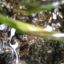

In [58]:
to_pil = ToPILImage()
img = to_pil(dataset[110][0])
img.save("temp.png")
img =  Image.open("temp.png").convert('RGB')
display(img)

In [59]:
train_dataloader = DataLoader(dataset, batch_size=4)
#test_dataloader = DataLoader(test_data, batch_size=64)

In [60]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [161]:
class MyAutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=4, kernel_size=2, stride=2, padding=4),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=4, out_channels=5, kernel_size=3, stride=2, padding=4),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=5, out_channels=6, kernel_size=4, stride=2, padding=4),
            nn.LeakyReLU()
        )
        self.decoder_stack = nn.Sequential(
            nn.ConvTranspose2d(in_channels=6, out_channels=5, kernel_size=4, stride=2, padding=4, output_padding=1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(in_channels=5, out_channels=4, kernel_size=3, stride=2, padding=4, output_padding=1),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(in_channels=4, out_channels=3, kernel_size=2, stride=2, padding=4, output_padding=0),
            nn.LeakyReLU()
        )


    def forward(self, x):
        x = self.encoder_stack(x)
        x = self.decoder_stack(x)
        return x

In [162]:
learning_rate = 5e-5
batch_size = 32
epochs = 5

train_dataloader = DataLoader(dataset, batch_size=batch_size)
test_dataloader = DataLoader(dataset, batch_size=batch_size)

autoencoder = MyAutoEncoder()

loss_fn = nn.MSELoss() #MSE

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)



In [163]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, X)


        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 1000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            visualize()


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

loss: 0.179087  [    0/500000]


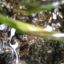

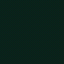

loss: 0.098132  [32000/500000]


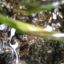

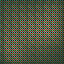

loss: 0.044283  [64000/500000]


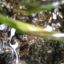

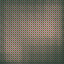

loss: 0.031313  [96000/500000]


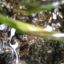

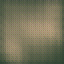

loss: 0.023213  [128000/500000]


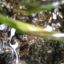

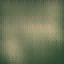

loss: 0.018388  [160000/500000]


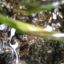

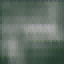

loss: 0.020365  [192000/500000]


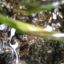

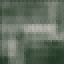

loss: 0.011088  [224000/500000]


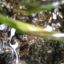

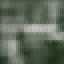

loss: 0.012690  [256000/500000]


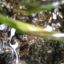

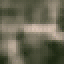

loss: 0.016855  [288000/500000]


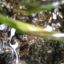

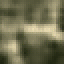

loss: 0.012530  [320000/500000]


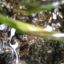

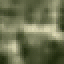

loss: 0.021735  [352000/500000]


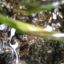

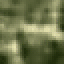

loss: 0.014590  [384000/500000]


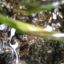

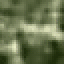

loss: 0.012154  [416000/500000]


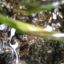

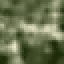

loss: 0.020699  [448000/500000]


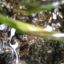

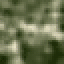

loss: 0.014218  [480000/500000]


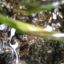

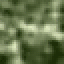

In [164]:
train_loop(train_dataloader, autoencoder, loss_fn, optimizer)

In [87]:
# With square kernels and equal stride
m = nn.ConvTranspose2d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
m = nn.ConvTranspose2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
input = torch.randn(20, 16, 50, 100)
output = m(input)
# exact output size can be also specified as an argument
input = torch.randn(1, 16, 12, 12)
downsample = nn.Conv2d(16, 16, 3, stride=2, padding=1)
upsample = nn.ConvTranspose2d(16, 16, 3, stride=2, padding=1)
h = downsample(input)
h.size()
output = upsample(h, output_size=input.size())
output.size()

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


torch.Size([1, 16, 12, 12])

In [89]:
h.size()

torch.Size([1, 16, 6, 6])

In [90]:
output.size()

torch.Size([1, 16, 12, 12])

In [91]:
input.size()

torch.Size([1, 16, 12, 12])